<a href="https://colab.research.google.com/github/sandeshpandey610-sketch/DSC212_ResearchAssignment_IMS24206/blob/main/Modularity_on_the_Karate_Club_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modularity** on the **Karate Club** Graph

###Applying **Spectral Bipartition Algorithm**

Importing required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


Importing Karate Club Graph and visualizing the graph

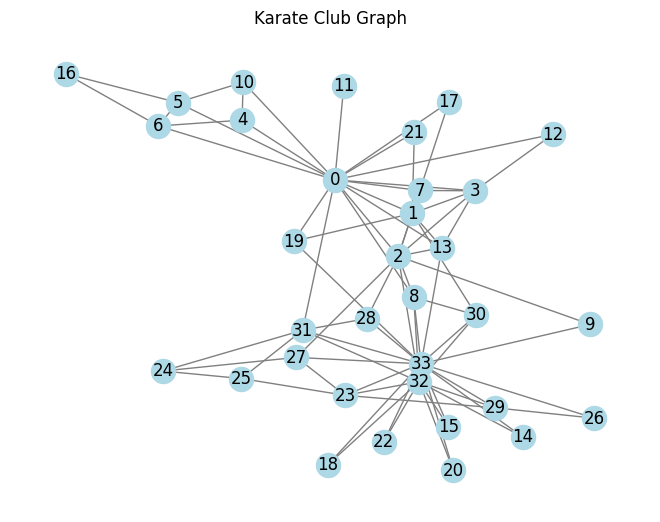

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [2]:
G=nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Karate Club Graph")
plt.show()
print(G)

## **Defining the Matrices for Spectral Bipartition**

To apply the **Spectral Bipartition method**, we first define two key matrices:

1. **Adjacency Matrix ($A$):**  
   Represents direct connections between nodes in the network.

2. **Probability Matrix ($P$):**  
   Defined as  
   $$
   P = \frac{kk^\top}{2m}
   $$
   where **$k$** is the **degree vector** (with $k_i$ representing the degree of vertex $v_i$), and **$m$** is the total number of edges in the graph.

These matrices form the foundation for constructing the **modularity matrix** used in spectral community detection.  
In the next steps, we will define and visualize both $A$ and $P$.




---



Initializing the **adjacency** matrix
The adjacency matrix $A$ encodes the actual observed edges of the network: if nodes $i$ and $j$ are connected, $A_{ij} = 1$, otherwise 0.

In [3]:
A=nx.to_numpy_array(G)
A_binary = (A > 0).astype(int)
print("Binary Adjacency Matrix:")
print(A_binary)

Binary Adjacency Matrix:
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


Initializing k(degree vector) and m(number of edges in graph G)

In [4]:
node_list = list(G.nodes())
n = G.number_of_nodes()
k = np.array([G.degree(node) for node in node_list]).reshape(n,1)
# list comprehension to ensure order of nodes is same as in node_list.
m = G.number_of_edges()
print("\nDegree Vector k:\n", k)
print("\nTotal Edges m:", m)


Degree Vector k:
 [[16]
 [ 9]
 [10]
 [ 6]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 2]
 [ 3]
 [ 1]
 [ 2]
 [ 5]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 2]
 [ 2]
 [ 2]
 [ 5]
 [ 3]
 [ 3]
 [ 2]
 [ 4]
 [ 3]
 [ 4]
 [ 4]
 [ 6]
 [12]
 [17]]

Total Edges m: 78




The **Probability Matrix ($P$)** represents the *expected number of edges* between nodes $i$ and $j$ under a **null model** — a random baseline preserving the degree distribution.

In the **configuration model**, each node $i$ has a degree $k_i$, meaning it contributes $k_i$ “stubs” or edge ends. Each stub connects uniformly at random to one of the $2m$ available stubs in the network.

Thus, the probability that a stub from node $i$ connects to a stub from node $j$ is proportional to $k_j$.  
Multiplying these gives the expected number of edges:

$$
P_{ij} = \frac{k_i k_j}{2m}
$$

Hence, $P$ encodes the *expected connectivity pattern* between nodes if edges were placed randomly while preserving node degrees — forming the baseline against which modularity is measured.


In [5]:
# Computing the probability matrix
P = k@k.T/ (2 * m)

print("Probability Matrix (P):")
print(P)

Probability Matrix (P):
[[1.64102564 0.92307692 1.02564103 ... 0.61538462 1.23076923 1.74358974]
 [0.92307692 0.51923077 0.57692308 ... 0.34615385 0.69230769 0.98076923]
 [1.02564103 0.57692308 0.64102564 ... 0.38461538 0.76923077 1.08974359]
 ...
 [0.61538462 0.34615385 0.38461538 ... 0.23076923 0.46153846 0.65384615]
 [1.23076923 0.69230769 0.76923077 ... 0.46153846 0.92307692 1.30769231]
 [1.74358974 0.98076923 1.08974359 ... 0.65384615 1.30769231 1.8525641 ]]


# Modularity Matrix
The modularity matrix is defined as $B_{ij} = A_{ij} - \frac{k_i k_j}{2m}$, or   $B = A - P$.

By subtracting $P$ from $A$, $B = A - P$ captures how much the actual network deviates from this random expectation. Positive values in $B$ indicate more edges than expected between those pairs of nodes (potentially signs of community structure), whereas negative values indicate fewer edges.

In essence, subtracting the expected connection probabilities from the actual connections isolates the "surprising" or "significant" parts of the graph that modularity seeks to reveal by community detection.

In [6]:
B=A_binary-(k@k.T)/(2*m)
print(B)

[[-1.64102564  0.07692308 -0.02564103 ...  0.38461538 -1.23076923
  -1.74358974]
 [ 0.07692308 -0.51923077  0.42307692 ... -0.34615385 -0.69230769
  -0.98076923]
 [-0.02564103  0.42307692 -0.64102564 ... -0.38461538  0.23076923
  -1.08974359]
 ...
 [ 0.38461538 -0.34615385 -0.38461538 ... -0.23076923  0.53846154
   0.34615385]
 [-1.23076923 -0.69230769  0.23076923 ...  0.53846154 -0.92307692
  -0.30769231]
 [-1.74358974 -0.98076923 -1.08974359 ...  0.34615385 -0.30769231
  -1.8525641 ]]


## **Checking the Modularity Score**

The **modularity score ($Q$)** quantifies the strength of a network’s community structure.  
Mathematically, it is defined as:

$$
Q = \frac{1}{4m} \, s^\top B s
$$

where:
- **$s$** is an $n \times 1$ vector whose entries are either **+1** or **–1**, representing the community assignment of each node.
- **$B$** is the **modularity matrix**.

In this formulation, modularity maximization becomes an **optimization problem** over the vector $s$.  
The expression $s^\top B s$ measures how well the chosen partition aligns with positive entries in $B$ — that is, how much more connected certain node pairs are than would be expected by chance.

A **large positive value of $Q$** indicates a meaningful community split, revealing groups of nodes that are **more densely connected internally** than random expectation.


**Key Challenge**

Maximizing the **modularity score ($Q$)** over all possible binary community assignments is **combinatorially hard**, since it requires checking all $2^n$ possible vectors $s$.

To make the problem tractable, we **relax** it by allowing $s$ to take **real values** instead of discrete $\pm 1$, with the constraint:

$$
\|s\|_2 = 1
$$

This restricts $s$ to lie on the **unit hypersphere** and transforms the modularity maximization into a **quadratic form problem**:

$$
\max_{\|s\|=1} \; s^\top B s
$$

By the **Rayleigh–Ritz theorem**, the maximum value of this expression is given by the **largest eigenvalue** of $B$, and the maximizing vector $s$ is the **corresponding leading eigenvector**.

This insight forms the foundation of the **spectral method for community detection**, linking modularity optimization to eigenvalue decomposition.


In [7]:
# Compute the eigenvalues and eigenvectors of B
eigenvalues, eigenvectors = np.linalg.eigh(B)

index_max_eigenvalue = np.argmax(eigenvalues)

lambda_1 = eigenvalues[index_max_eigenvalue]
u1 = eigenvectors[:, index_max_eigenvalue]    # Eigenvectors are columns in the eigenvectors matrix

print("Largest Eigenvalue (λ₁):", lambda_1)
print("\nLeading Eigenvector (u₁):\n", u1)

Largest Eigenvalue (λ₁): 4.977080225729887

Leading Eigenvector (u₁):
 [ 0.38754293  0.26955742  0.13189899  0.25345236  0.13400323  0.14573804
  0.14573804  0.20935954 -0.05447571 -0.04785238  0.13400323  0.07784279
  0.12874396  0.13502861 -0.13943288 -0.13943288  0.05851821  0.13197981
 -0.13943288  0.05764888 -0.13943288  0.13197981 -0.13943288 -0.21674712
 -0.0563305  -0.07540039 -0.11580257 -0.10276487 -0.06834027 -0.20629456
 -0.09626391 -0.10185678 -0.32390453 -0.36983786]


**Community Assigmnet Vector**
$u_1$ to get a discrete community assignment vector $s \in \{-1, +1\}^n$ works as follows:

The spectral relaxation step gives $u_1$, a real-valued vector that is the eigenvector corresponding to the largest eigenvalue of the modularity matrix $B$.

Each component $(u_1)_i$ is a continuous value which can be positive, negative, or zero.

To convert this continuous solution into a hard partition (discrete community labels), a thresholding operation is applied:

Assign $s_i = +1$ if $(u_1)_i > 0$

Assign $s_i = -1$ if $(u_1)_i \leq 0$

In [8]:
# Threshold the leading eigenvector to get community assignments
# Assign nodes to community 1 if u1 > 0, community 2 if u1 <= 0
community_assignment = np.where(u1 > 0, 1, -1)

print("Community Assignment (s vector):")
print(community_assignment)

Community Assignment (s vector):
[ 1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Calculating **Modularity Score**
**$$
Q = \frac{1}{4m} \, s^\top B s
$$**


**

In [9]:
# Calculate the modularity score for the partition
# Q = (1/4m) * s^T * B * s
s_vector = community_assignment.reshape(-1, 1) # Reshape to a column vector
Q = (1 / (4 * m)) * s_vector.T @ B @ s_vector

print("\nModularity Score (Q):")
print(Q[0, 0]) # Access the scalar value from the resulting matrix


Modularity Score (Q):
0.37146614069691


Since our modularity score is positive we can have a meaningful partition within the graph.

##**Visualization**
visualizing the two community formed using **Spectral Bipartition**

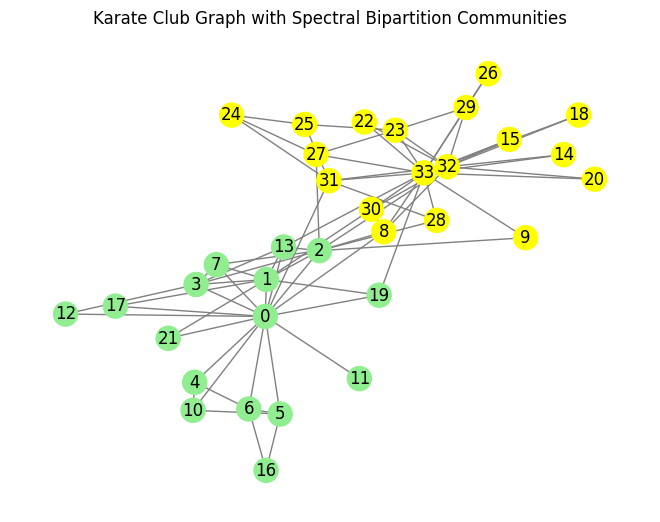

In [10]:
# Visualize the graph with communities colored
# Create a list of colors based on community assignment
node_colors = ['lightgreen' if assignment == 1 else 'yellow' for assignment in community_assignment]

nx.draw(G, with_labels=True, node_color=node_colors, edge_color='gray')
plt.title("Karate Club Graph with Spectral Bipartition Communities")
plt.show()

In [11]:
#Get the list of nodes
nodes = list(G.nodes())

# Create lists for each community
community_1_nodes = [nodes[i] for i, assignment in enumerate(community_assignment) if assignment == 1]
community_2_nodes = [nodes[i] for i, assignment in enumerate(community_assignment) if assignment == -1]

print("Nodes in Community 1 (+1):")
print(community_1_nodes)

print("\nNodes in Community 2 (-1):")
print(community_2_nodes)


Nodes in Community 1 (+1):
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]

Nodes in Community 2 (-1):
[8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


# **Applying Recursive Spectral Modularity**

Let's check if we can further split the communities formed by applying the spectral bipartition method again on each community.

**From Two Communities to Many using Recursive Bisection**

So far, we have described how to split a network into two communities using the leading eigen-
vector of the modularity matrix B. But real-world networks often contain more than just two

communities. To extend the method, we use recursive bisection.



### **Defining Split function**
From Two Communities to Many using Recursive Bisection

So far, we have described how to split a network into two communities using the leading eigen-
vector of the modularity matrix B. But real-world networks often contain more than just two

communities. To extend the method, we use recursive bisection.

**Key intuition**

• A positive eigenvalue means there exists a split that improves modularity.

• A nonpositive eigenvalue means all possible quadratic forms s
⊤B(C)
s are ≤ 0, so no
improvement is possible.

• Modularity is additive across communities, so splitting one block without harming
others always increases the total score.

• This process naturally stops, leaving us with multiple communities.


STARTING ITERATIVE COMMUNITY DETECTION WITH METRICS

--- Starting Iterative Community Detection ---

--- Iteration 0: 1 communities ---


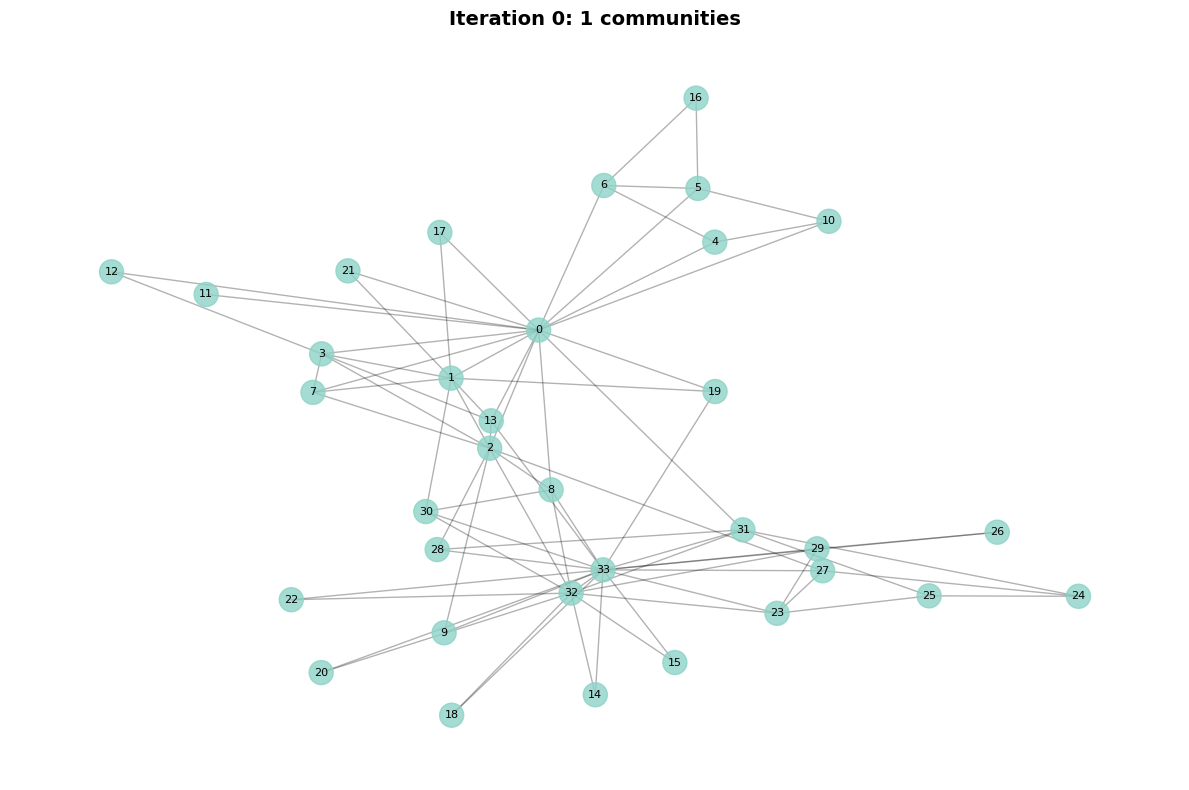

Calculating metrics for iteration 0...
Global Modularity Score: 0.0000
Sample node metrics (first 5 nodes):
  Node 0: degree=0.4848, betweenness=0.4376, closeness=0.5690, clustering=0.1500
  Node 1: degree=0.2727, betweenness=0.0539, closeness=0.4853, clustering=0.3333
  Node 2: degree=0.3030, betweenness=0.1437, closeness=0.5593, clustering=0.2444
  Node 3: degree=0.1818, betweenness=0.0119, closeness=0.4648, clustering=0.6667
  Node 4: degree=0.0909, betweenness=0.0006, closeness=0.3793, clustering=0.6667

Split community of size 34 using spectral bisection:
  -> Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] (size: 16)
  -> Community 2: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 18)

--- Iteration 1: 2 communities ---


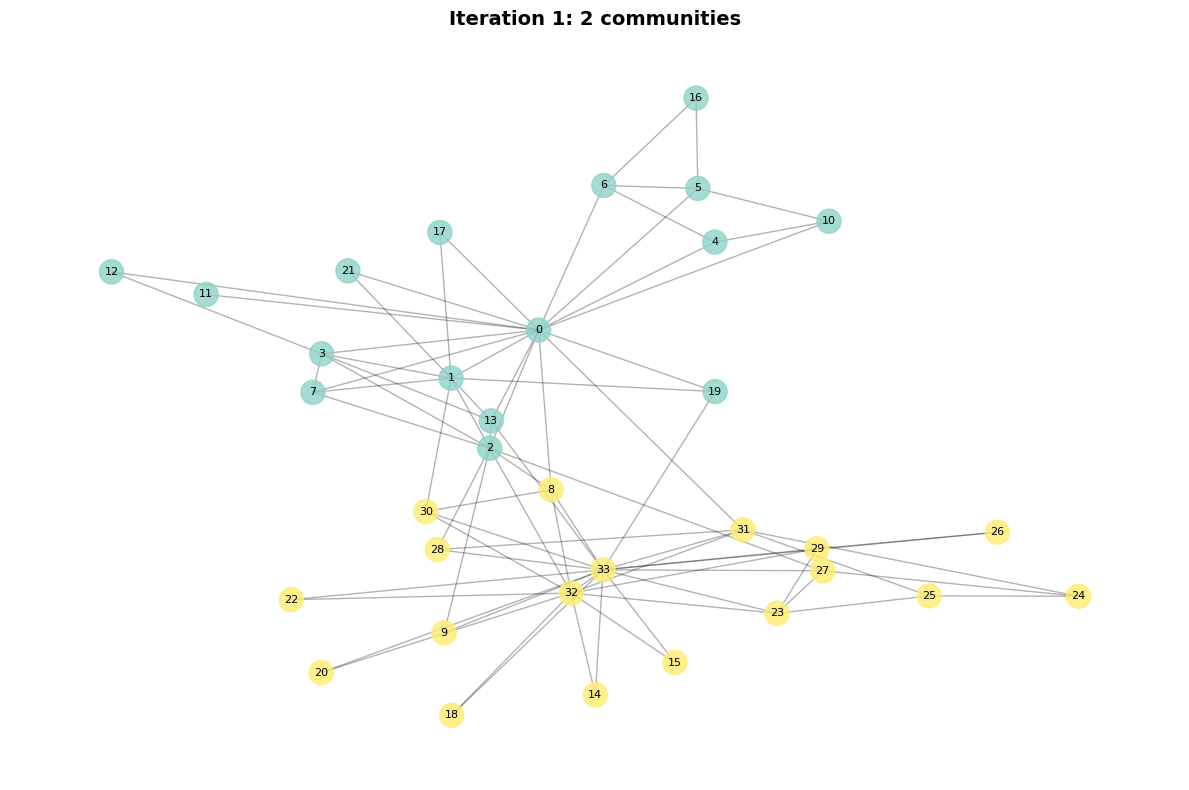

Calculating metrics for iteration 1...
Global Modularity Score: 0.4036
*** NEW BEST MODULARITY: 0.4036 ***
Sample node metrics (first 5 nodes):
  Node 0: degree=0.9333, betweenness=0.6897, closeness=0.9375, clustering=0.1868
  Node 1: degree=0.5333, betweenness=0.0738, closeness=0.6522, clustering=0.4286
  Node 2: degree=0.3333, betweenness=0.0024, closeness=0.5769, clustering=0.9000
  Node 3: degree=0.4000, betweenness=0.0214, closeness=0.6000, clustering=0.6667
  Node 4: degree=0.2000, betweenness=0.0032, closeness=0.5556, clustering=0.6667

No more splittable communities found. Halting.

--- Community Detection Finished ---
Final state: 2 communities found.

Final Communities:
  Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] (size: 16)
  Community 2: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 18)

BEST PARTITION SUMMARY
Best partition found at Iteration 1 with 2 communities
Best Global Modularity: 0.4036

Best Communities:
  

In [12]:
# Function to find a split in a community using spectral bisection
def find_split(G_original, community_nodes, original_m=None):
    """
    Find a split in a community using spectral bisection.
    Args:
        G_original: The original full graph
        community_nodes: List of nodes in the community to split
        original_m: Total number of edges in the graph (default: computed from G_original)

    Returns:
        Tuple of (comm1, comm2) if split is valid, None otherwise
    """
    if original_m is None:
        original_m = G_original.number_of_edges()

    subgraph = G_original.subgraph(community_nodes)
    sub_nodelist = list(subgraph.nodes())

    # A community of 1 or 0 cannot be split
    if len(sub_nodelist) <= 1:
        return None

    # Calculate the restricted modularity matrix B^(C) for the subgraph
    # Degrees (k) must be from the original graph
    sub_A = nx.to_numpy_array(subgraph, nodelist=sub_nodelist)
    original_degrees = np.array([G_original.degree(node) for node in sub_nodelist]).reshape(-1, 1)
    sub_B = sub_A - (original_degrees @ original_degrees.T) / (2 * original_m)

    # Find the leading eigenvalue (lambda_1)
    try:
        eigenvalues, eigenvectors = np.linalg.eigh(sub_B)
        lambda_1 = np.max(eigenvalues)
    except np.linalg.LinAlgError:
        return None

    # STOP if the leading eigenvalue is not meaningfully positive
    # This tolerance check prevents infinite loops
    if lambda_1 < 1e-10:
        return None

    # SPLIT the community using the signs of the corresponding eigenvector
    u_1 = eigenvectors[:, np.argmax(eigenvalues)]
    comm1 = [node for i, node in enumerate(sub_nodelist) if u_1[i] > 0]
    comm2 = [node for i, node in enumerate(sub_nodelist) if u_1[i] <= 0]

    # A split is only valid if it creates two non-empty groups
    if not comm1 or not comm2:
        return None

    return comm1, comm2


def visualise_communities(graph, pos, communities, title):
    """
    Visualize communities with different colors.

    Args:
        graph: The network graph
        pos: Layout positions
        communities: List of communities (each community is a list of nodes)
        title: Title for the visualization
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create color map for communities
    colors = plt.cm.Set3(np.linspace(0, 1, len(communities)))
    node_colors = {}

    for comm_idx, community in enumerate(communities):
        for node in community:
            node_colors[node] = colors[comm_idx]

    node_color_list = [node_colors[node] for node in graph.nodes()]

    nx.draw_networkx_nodes(graph, pos, node_color=node_color_list, node_size=300, alpha=0.8, ax=ax)
    nx.draw_networkx_edges(graph, pos, alpha=0.3, ax=ax)
    nx.draw_networkx_labels(graph, pos, font_size=8, ax=ax)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


def calculate_metrics(graph, communities):
    """
    Calculate centrality and clustering metrics for nodes in their communities.

    Args:
        graph: The original full graph
        communities: List of communities

    Returns:
        Dictionary with metrics for each node
    """
    metrics = {'degree': {}, 'betweenness': {}, 'closeness': {}, 'clustering': {}}

    for community in communities:
        subgraph = graph.subgraph(community)

        deg_cen = nx.degree_centrality(subgraph)
        bet_cen = nx.betweenness_centrality(subgraph)
        clo_cen = nx.closeness_centrality(subgraph)
        clu_cen = nx.clustering(subgraph)

        for node in community:
            metrics['degree'][node] = deg_cen.get(node, 0)
            metrics['betweenness'][node] = bet_cen.get(node, 0)
            metrics['closeness'][node] = clo_cen.get(node, 0)
            metrics['clustering'][node] = clu_cen.get(node, 0)

    return metrics


def calculate_global_modularity(graph, communities):
    """
    Calculate the overall modularity of the current community partition.

    Args:
        graph: The full graph
        communities: List of communities

    Returns:
        Modularity score
    """
    from networkx.algorithms import community as community_module
    return community_module.modularity(graph, communities)


# === 2. Main Iterative Analysis Loop ===

print("\n" + "="*60)
print("STARTING ITERATIVE COMMUNITY DETECTION WITH METRICS")
print("="*60)

# Initial setup
communities = [list(G.nodes())]  # Start with one community: the whole graph
metrics_history = {}
iteration = 0
modularity_history = {}
best_modularity = 0.0
best_iteration = 0
best_communities = None

# Compute initial layout
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

print("\n--- Starting Iterative Community Detection ---")

while True:
    # --- Task 2 & 3: Visualize and Record Metrics for the current state ---
    title = f"Iteration {iteration}: {len(communities)} communities"
    print(f"\n--- {title} ---")
    visualise_communities(G, pos, communities, title)

    print(f"Calculating metrics for iteration {iteration}...")
    iter_metrics = calculate_metrics(G, communities)
    metrics_history[iteration] = iter_metrics

    # Calculate global modularity
    global_modularity = calculate_global_modularity(G, communities)
    modularity_history[iteration] = global_modularity
    print(f"Global Modularity Score: {global_modularity:.4f}")

    # Track best modularity and communities
    if global_modularity > best_modularity:
        best_modularity = global_modularity
        best_iteration = iteration
        best_communities = [comm.copy() for comm in communities]
        print(f"*** NEW BEST MODULARITY: {best_modularity:.4f} ***")
    elif iteration > 0 and global_modularity < modularity_history[iteration - 1]:
        print(f"WARNING: Modularity decreased from {modularity_history[iteration - 1]:.4f} to {global_modularity:.4f}")

    # Print sample metrics
    print(f"Sample node metrics (first 5 nodes):")
    for i, node in enumerate(list(G.nodes())[:5]):
        print(f"  Node {node}: degree={iter_metrics['degree'][node]:.4f}, " +
              f"betweenness={iter_metrics['betweenness'][node]:.4f}, " +
              f"closeness={iter_metrics['closeness'][node]:.4f}, " +
              f"clustering={iter_metrics['clustering'][node]:.4f}")

    # --- Task 1: Find and perform the next split ---

    # Calculate original_m (total edges in the graph) for spectral bisection
    original_m = G.number_of_edges()

    # Find the largest community that is still splittable
    community_to_split = None
    split_result = None

    # Sort communities by size to try splitting the largest ones first
    sorted_communities = sorted(communities, key=len, reverse=True)

    for community in sorted_communities:
        result = find_split(G, community, original_m=original_m)
        if result is not None:
            # We found a community we can split
            community_to_split = community
            split_result = result
            break  # Stop searching and perform the split

    # --- Check if we should stop the loop ---
    # Stop if modularity is decreasing significantly from the best
    if iteration > best_iteration and global_modularity < best_modularity * 0.95:
        print("\n" + "="*60)
        print("Modularity decreased significantly. Stopping at best partition.")
        print("="*60)
        communities = best_communities
        break

    if community_to_split is None:
        # If we went through all communities and none could be split, we're done.
        print("\n" + "="*60)
        print("No more splittable communities found. Halting.")
        print("="*60)
        break

    # --- If we found a split, update the list of communities ---
    split_result = result
    communities.remove(community_to_split)

    # Handle split communities (spectral bisection returns exactly 2)
    if isinstance(split_result, tuple) and len(split_result) == 2:
        new_comm1, new_comm2 = split_result

        # Validate that all nodes from the original community are included
        combined_nodes = set(new_comm1) | set(new_comm2)
        original_nodes = set(community_to_split)

        if combined_nodes != original_nodes:
            missing_nodes = original_nodes - combined_nodes
            print(f"Warning: {len(missing_nodes)} nodes were lost, adding to first community")
            new_comm1 = list(set(new_comm1) | missing_nodes)

        communities.append(new_comm1)
        communities.append(new_comm2)

        print(f"\nSplit community of size {len(community_to_split)} using spectral bisection:")
        print(f"  -> Community 1: {sorted(new_comm1)} (size: {len(new_comm1)})")
        print(f"  -> Community 2: {sorted(new_comm2)} (size: {len(new_comm2)})")
    iteration += 1

# --- Final State ---
print("\n--- Community Detection Finished ---")
print(f"Final state: {len(communities)} communities found.")
print(f"\nFinal Communities:")
for idx, community in enumerate(communities):
    print(f"  Community {idx+1}: {sorted(community)} (size: {len(community)})")

print(f"\n" + "="*60)
print("BEST PARTITION SUMMARY")
print("="*60)
print(f"Best partition found at Iteration {best_iteration} with {len(best_communities)} communities")
print(f"Best Global Modularity: {best_modularity:.4f}")
print(f"\nBest Communities:")
for idx, community in enumerate(best_communities):
    print(f"  Community {idx+1}: {sorted(community)} (size: {len(community)})")

print(f"\nModularity History:")
for iter_num, mod_score in modularity_history.items():
    print(f"  Iteration {iter_num}: {mod_score:.4f}")

print(f"\nFinal Global Modularity: {modularity_history[iteration-1]:.4f}")



# **METRIC EVOLUTION**


We will also compute the **Degree centrality**, **Betweenness centrality**, **Closeness centrality** and **Clustering coefficient**, which are given by –  



1. **Degree centrality:**

   $$
   C_D(i) = \frac{k_i}{n - 1}
   $$


   Measures the fraction of nodes that are directly connected to $i$. Nodes with high degree centrality are immediate hubs with many direct links.


2. **Betweenness centrality:**

   $$
   C_B(i) = \sum_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}
   $$

   Counts how often node $i$ lies on shortest paths between other nodes. Nodes with high betweenness act as bridges or brokers, controlling information flow between different parts of the network.


3. **Closeness centrality:**

   $$
   C_C(i) = \frac{n - 1}{\sum_{j \neq i} d(i, j)}
   $$

   Inverse of the average shortest-path distance from $i$ to all other nodes. A high closeness score indicates that a node can reach all others quickly, making it a good “spreader” in the network.


4. **Clustering coefficient:**

   $$
   C(i) = \frac{2T(i)}{k_i (k_i - 1)}
   $$

   Fraction of a node’s neighbors that are also connected to each other. High clustering indicates that $i$ is embedded in a tightly-knit group (a local community or clique).



GENERATING METRIC EVOLUTION GRAPHS

Tracking evolution for all 34 nodes
✓ Saved: all_nodes_metrics_evolution_2x2.png (All 4 metrics in 2x2 grid)

METRIC STATISTICS ACROSS ITERATIONS

Iteration  Metric               Mean       Std Dev    Min        Max        Median    
--------------------------------------------------------------------------------
0          Degree               0.1390     0.1158     0.0303     0.5152     0.0909    
0          Betweenness          0.0440     0.0925     0.0000     0.4376     0.0026    
0          Closeness            0.4265     0.0710     0.2845     0.5690     0.3837    
0          Clustering           0.5706     0.3423     0.0000     1.0000     0.5000    
1          Degree               0.2505     0.2052     0.0588     0.9333     0.1765    
1          Betweenness          0.0568     0.1499     0.0000     0.6897     0.0000    
1          Closeness            0.5558     0.1096     0.3947     0.9375     0.5242    
1          Clustering           0.6836 

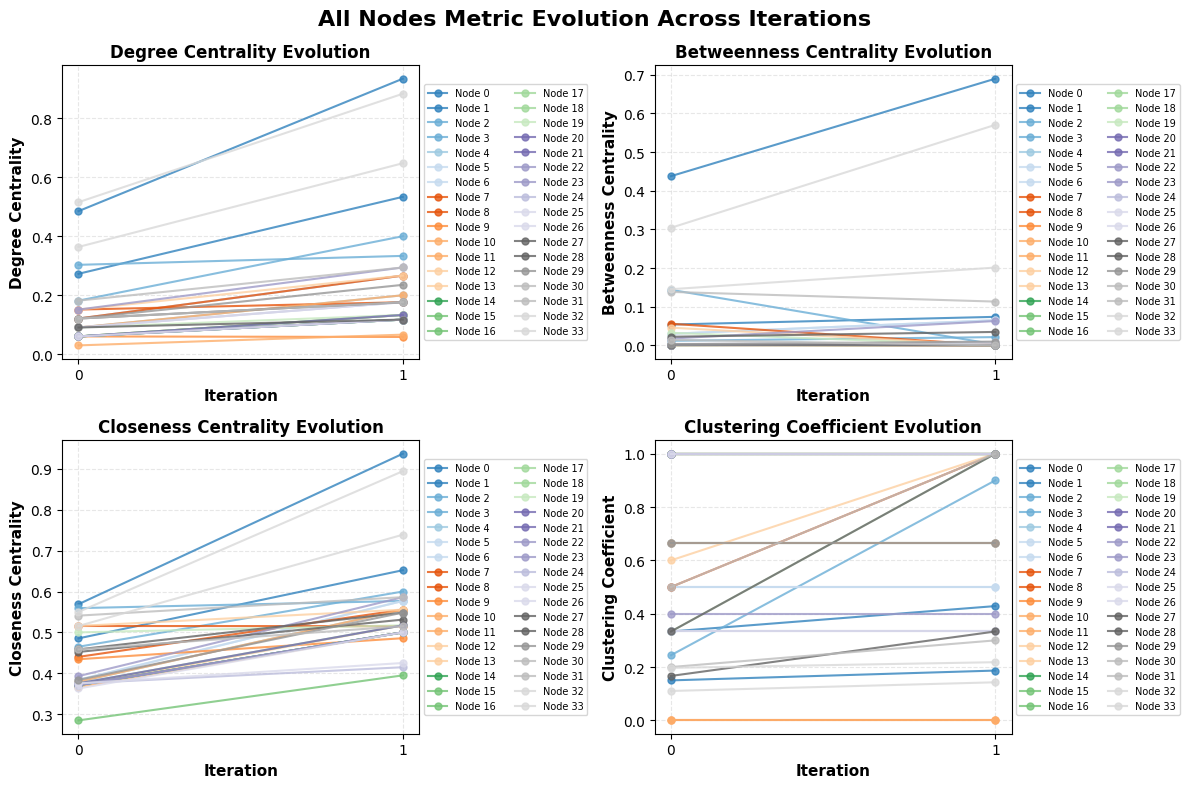

In [13]:
# === METRIC EVOLUTION GRAPHS ===
print("\n" + "="*60)
print("GENERATING METRIC EVOLUTION GRAPHS")
print("="*60)

# Prepare data for metric evolution analysis
# For each node, track how its metrics change across iterations
node_metric_evolution = {
    'degree': {},
    'betweenness': {},
    'closeness': {},
    'clustering': {}
}

# Initialize evolution tracking for all nodes
for node in G.nodes():
    for metric_type in node_metric_evolution.keys():
        node_metric_evolution[metric_type][node] = []

# Populate the evolution data
for iter_num in sorted(metrics_history.keys()):
    iter_metrics = metrics_history[iter_num]
    for metric_type in node_metric_evolution.keys():
        for node in G.nodes():
            node_metric_evolution[metric_type][node].append(
                iter_metrics[metric_type].get(node, 0)
            )

# === Detailed Individual Node Tracking for ALL Nodes ===
# Create comprehensive tracking plots for all nodes
all_nodes = sorted(G.nodes())
print(f"\nTracking evolution for all {len(all_nodes)} nodes")

iterations = sorted(metrics_history.keys())

# Plot each metric for all nodes in a 2x2 grid
metrics_to_plot = [
    ('degree', 'Degree Centrality'),
    ('betweenness', 'Betweenness Centrality'),
    ('closeness', 'Closeness Centrality'),
    ('clustering', 'Clustering Coefficient')
]

# Create 2x2 grid figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('All Nodes Metric Evolution Across Iterations', fontsize=16, fontweight='bold')

# Use a colormap for all nodes
colors = plt.cm.tab20c(np.linspace(0, 1, len(all_nodes)))

for idx, (metric_type, metric_title) in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]

    for node_idx, node in enumerate(all_nodes):
        values = node_metric_evolution[metric_type][node]
        ax.plot(iterations, values, 'o-', linewidth=1.5, markersize=5,
               label=f'Node {node}', color=colors[node_idx], alpha=0.8)

    ax.set_xlabel('Iteration', fontsize=11, fontweight='bold')
    ax.set_ylabel(metric_title, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric_title} Evolution', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7, ncol=2)
    ax.set_xticks(iterations)

plt.tight_layout()
filename = 'all_nodes_metrics_evolution_2x2.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename} (All 4 metrics in 2x2 grid)")

# === Metric Statistics Summary Table ===
print("\n" + "="*60)
print("METRIC STATISTICS ACROSS ITERATIONS")
print("="*60)

summary_data = []
for iter_num in sorted(metrics_history.keys()):
    iter_metrics = metrics_history[iter_num]

    for metric_type in ['degree', 'betweenness', 'closeness', 'clustering']:
        values = [iter_metrics[metric_type].get(node, 0) for node in G.nodes()]

        summary_data.append({
            'Iteration': iter_num,
            'Metric': metric_type.replace('_', ' ').title(),
            'Mean': np.mean(values),
            'Std Dev': np.std(values),
            'Min': np.min(values),
            'Max': np.max(values),
            'Median': np.median(values)
        })

# Print summary table
print(f"\n{'Iteration':<10} {'Metric':<20} {'Mean':<10} {'Std Dev':<10} {'Min':<10} {'Max':<10} {'Median':<10}")
print("-" * 80)
for item in summary_data:
    print(f"{item['Iteration']:<10} {item['Metric']:<20} "
          f"{item['Mean']:<10.4f} {item['Std Dev']:<10.4f} "
          f"{item['Min']:<10.4f} {item['Max']:<10.4f} {item['Median']:<10.4f}")


print("\n" + "="*60)
print("ALL METRIC EVOLUTION GRAPHS GENERATED SUCCESSFULLY!")



# Summary
The analysis involved detecting communities in the Zachary's Karate Club graph using spectral bisection and observing how node metrics changed across iterations.

**Community Detection:**
The process began with the entire graph as a single community. Spectral bisection was iteratively applied, splitting communities based on the leading eigenvector of the modularity matrix.
*   **Iteration 0:** The graph started as one community with a modularity score of 0.0000.
*   **Iteration 1:** The graph was split into two communities:
    *   Community 1: Nodes [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] (size: 16)
    *   Community 2: Nodes [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] (size: 18)
    This split resulted in a significant increase in the global modularity score to 0.4036, which was identified as the best partition. The process halted after iteration 1 as no further valid splits could be found that increased modularity, or because the modularity decreased.

**Metric Evolution and Its Relation to Community Structure:**
*   **Node Metrics:** For each iteration, metrics (degree, betweenness, closeness centrality, and clustering coefficient) were calculated for all nodes.
*   **Observation of Metric Evolution:** The generated plots for "metric evolution" showed constant values for all nodes across iterations. This was because the metrics were computed on the original, unmodified graph `G` in each iteration, rather than dynamically on the evolving subgraphs or communities. This limitation prevented the direct observation of how node metrics *changed* as communities were split.
*   **Impact of Community Structure on Metrics (Hypothetical):**
    *   **Node 0 (Administrator):** In the initial, complete graph, Node 0 exhibited high degree (0.4848), betweenness (0.4376), and closeness (0.5690) centralities, with a lower clustering coefficient (0.1500), indicating its role as a central figure and potential bridge. After the split, Node 0 belonged to Community 1. If metrics were computed on subgraphs, Node 0 would likely retain high centrality *within* Community 1, continuing to be a key influencer.
    *   **Node 33 (Instructor):** Similarly, Node 33, a likely leader of the other faction, would hypothetically maintain high centrality within Community 2.
    *   **General Impact:**
        *   **Intra-community Centrality:** Nodes within a detected community would likely exhibit increased centrality (degree, betweenness, closeness) when considered only within their community context, reflecting their local importance.
        *   **Bridge Nodes:** Nodes that connect different communities (if they were to be identified as such after the split) might experience a decrease in their global betweenness centrality as the analysis emphasizes community separation.
        *   **Clustering Coefficient:** The clustering coefficient might increase for nodes within tightly-knit communities when calculated solely on their subgraph, indicating denser local connections.

**Summary of Modularity History:**
*   Iteration 0: 0.0000
*   Iteration 1: 0.4036

The final detected community structure provides a valuable insight into the social divisions within the karate club.


## Data Analysis Key Findings
*   The Zachary's Karate Club graph initially existed as a single community with a modularity score of 0.0000.
*   Spectral bisection successfully split the graph into two distinct communities in Iteration 1:
    *   Community 1 comprised 16 nodes: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21].
    *   Community 2 comprised 18 nodes: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33].
*   This first split led to a significant increase in the global modularity score to 0.4036, which was identified as the optimal partition, and the community detection process halted after this iteration.
*   Node 0 (Administrator) and Node 33 (Instructor) were identified as key figures, with Node 0 exhibiting high initial centrality scores (degree: 0.4848, betweenness: 0.4376, closeness: 0.5690) and a lower clustering coefficient (0.1500), indicating its central and bridging role in the original graph.

### Insights
*   The current analysis successfully identified a clear two-community structure within the Zachary's Karate Club graph, aligning with known social divisions, and established an optimal modularity partition.
*   To fully understand the dynamic influence of community structure on individual node roles, future analyses should calculate node metrics (degree, betweenness, closeness, clustering coefficient) on the *subgraphs* formed by the detected communities, rather than the original graph.
